# Spaceship Titanic Kaggle Challenge
The intergalatic passenger liner "SpaceShip Titanic" was on its inaugural journey when it collided with a spacetime anomaly covered with a dust cloud. The ship remained intact, and the passengers were being moved to an alternate ship. The group **SHOOTING STARS** on this project, is tasked to use the spaceship dataset retrived from its computer system to predict which "passengers" were "transpored" (target variable) successfully to the alternate ship.

### Importing The Required Libraries



In [ ]:
# Import the Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

### Loading The Dataset

In [ ]:
# Loading the datasets
train_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/train.csv?token=GHSAT0AAAAAACT6XUA65JEXKVODDDDMJKTOZUNS4LQ"
df_train = pd.read_csv(train_data)
df_train.head()


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
test_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/test.csv?token=GHSAT0AAAAAACT6XUA7BVV6IFI5TEDRWTV2ZUNS4ZQ"
df_test = pd.read_csv(test_data)
df_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [ ]:
sample_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/sample_submission.csv?token=GHSAT0AAAAAACT6XUA7BMQ4GUQ7DAWQ2SDOZUNS5IA"
df_sample = pd.read_csv(sample_data)
df_sample.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

### The Exploratory Data Analysis (EDA)

In [ ]:
# The necessary information of our train dataset and summary statistics
df_train.info()
df_train.describe()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(8693, 14)

In [ ]:
# Checking for duplicates in the dataset
df_train.duplicated().sum()


0


Missing values in the training Data:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


<Axes: >

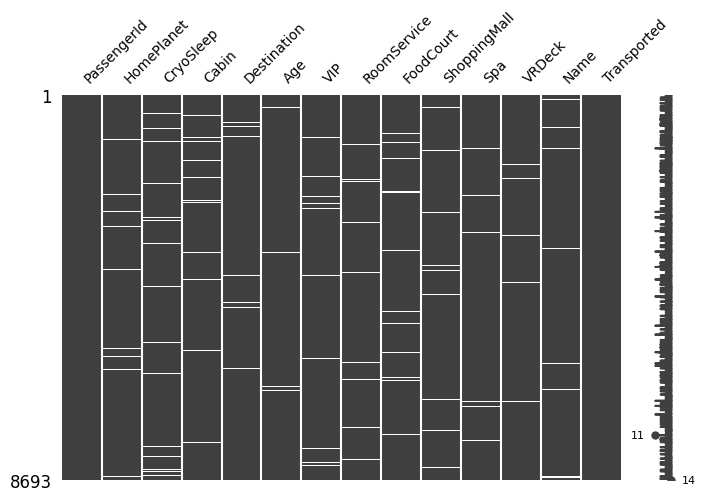

In [ ]:
# checking for missing value in the train dataset
print("\nMissing values in the training Data:")
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

# Visualising the missing values for better insights and understanding
msno.matrix(df_train,figsize=(8,5),fontsize=10)

In [ ]:
# Checking the percentage of the missing values
print("\nPercentage of Missing Data:")
print((missing_values / len(df_train)) * 100)


Percentage of Missing Data:
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


###### The percentage of the missing data are quite uniformly distributed across the different features which each having around 2%.
###### We will be handling these missing values appropriately so that we can build a robust model.

In [ ]:
# We will be creating imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# The columns to impute
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

# Imputing the numeric columns
df_train[num_columns] = num_imputer.fit_transform(df_train[num_columns])

# Imputing the categorical columns
df_train[cat_columns] = cat_imputer.fit_transform(df_train[cat_columns])

# Checking if any missing values remain
print("Missing values after imputation:")
print(df_train.isnull().sum())


Missing values after imputation:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


**Exploratory Data Analysis(EDA)**



Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

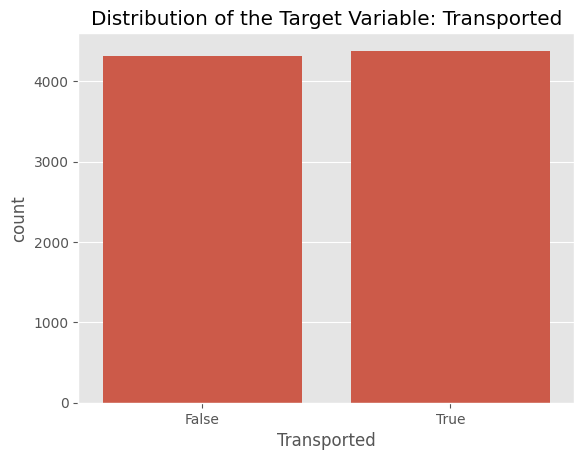

In [ ]:
# Checking the distribution of the target variable
plt.style.use('ggplot')
sns.countplot(x='Transported', data=df_train).set_title('Distribution of the Target Variable: Transported')
df_train['Transported'].value_counts(normalize=True) * 100

Text(0.5, 1.0, 'Distribution of Numerical Columns')

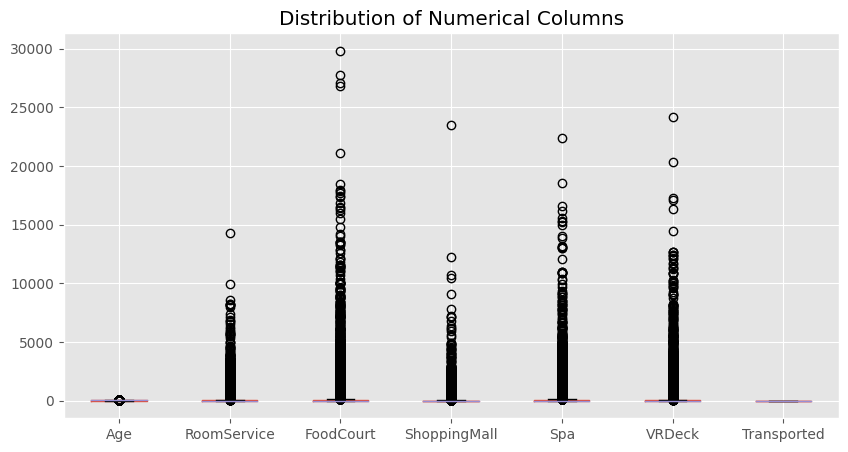

In [ ]:
# Checking the distribution of the numerical variables using a box plot
df_train.boxplot(figsize=(10, 5)).set_title('Distribution of Numerical Columns')


In [ ]:
# Converting 'CryoSleep' and 'VIP' to boolean
df_train['CryoSleep'] = df_train['CryoSleep'].astype('bool')
df_train['VIP'] = df_train['VIP'].astype('bool')

In [ ]:
# confirming changes
print(df_train.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [ ]:
# We need to exclude 'PassengerId', 'Name', and any other non-relevant object type columns
columns_to_exclude = ['PassengerId', 'Name', 'HomePlanet', 'Cabin', 'Destination']
df_numeric = df_train.drop(columns=columns_to_exclude)

In [ ]:
# Ensuring that all remaining columns are numeric or boolean
for column in df_numeric.columns:
    if df_numeric[column].dtype == 'object':
        df_numeric[column] = pd.to_numeric(df_numeric[column], errors='coerce')

# Checking data types to confirm all are numeric or boolean
print("Data types after conversion:")
print(df_numeric.dtypes)

Data types after conversion:
CryoSleep          bool
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object


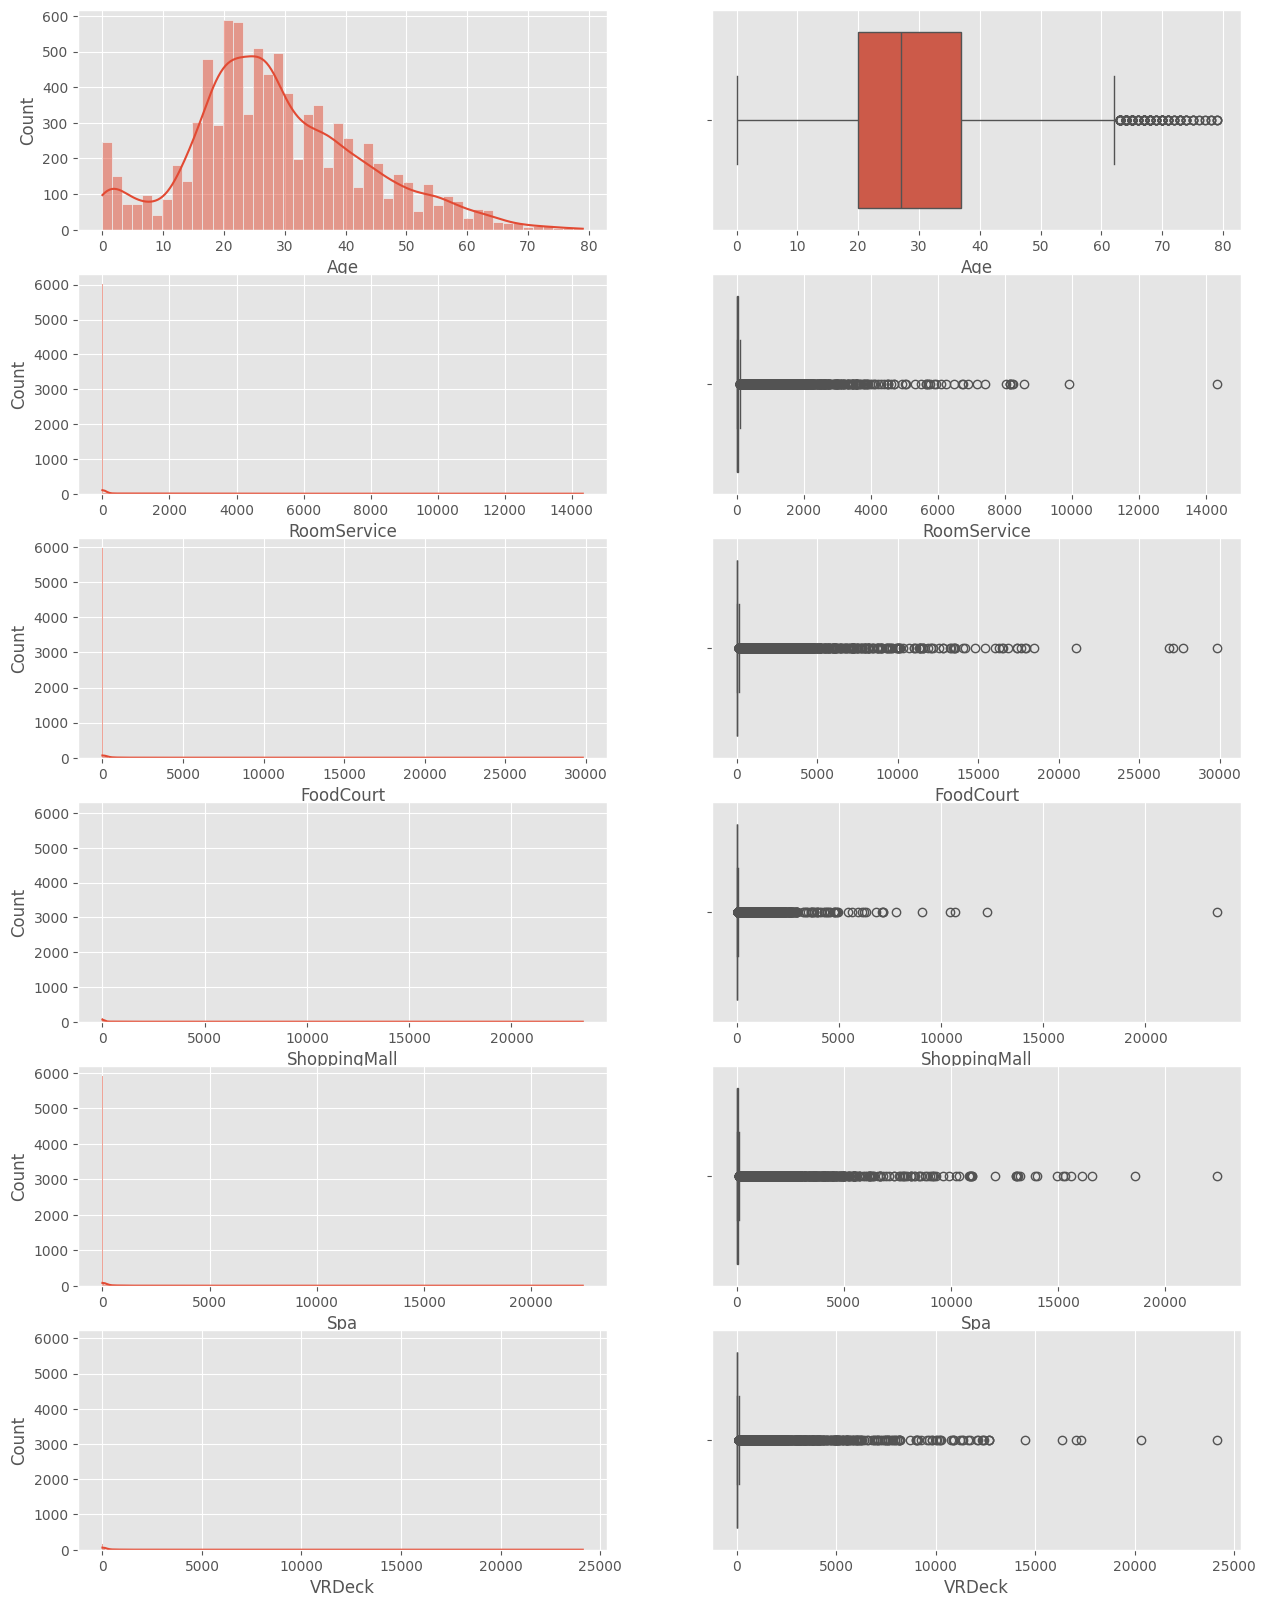

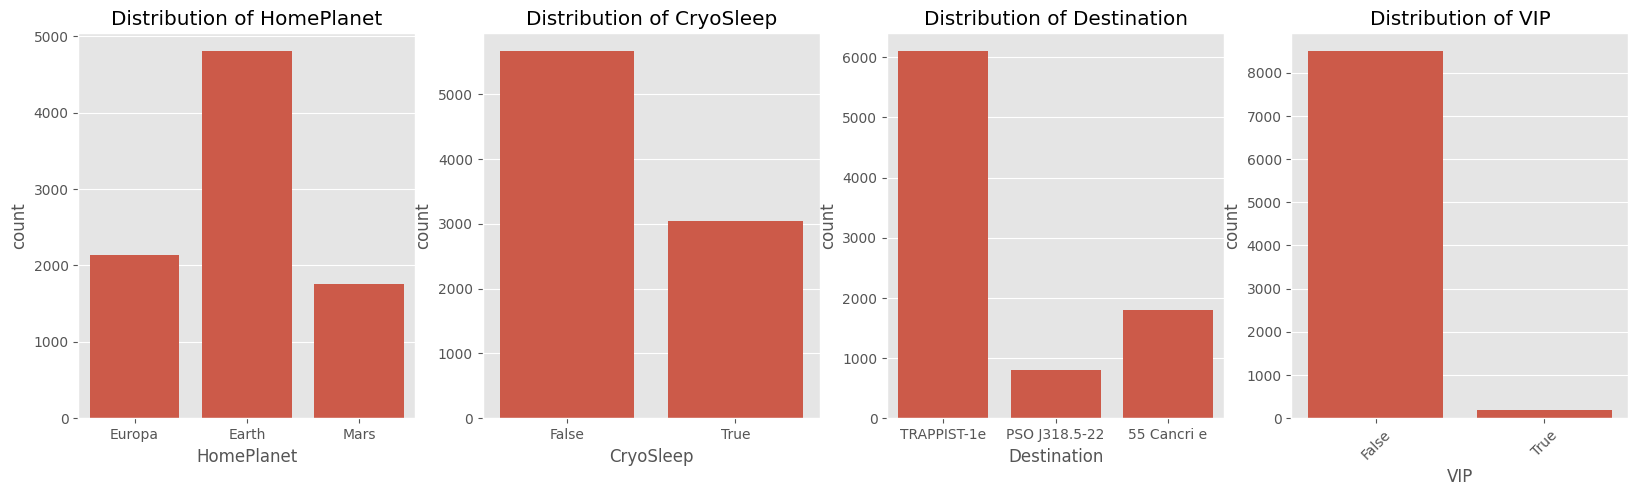

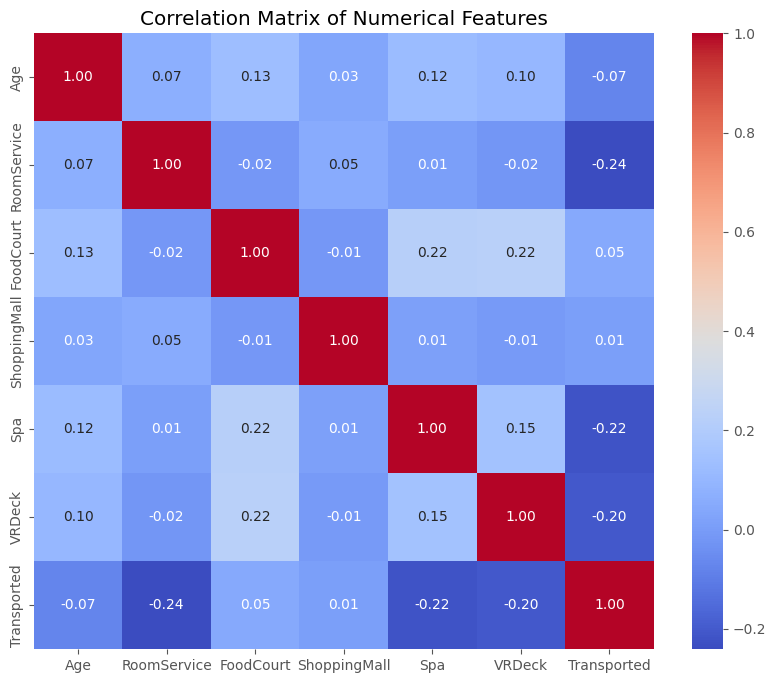

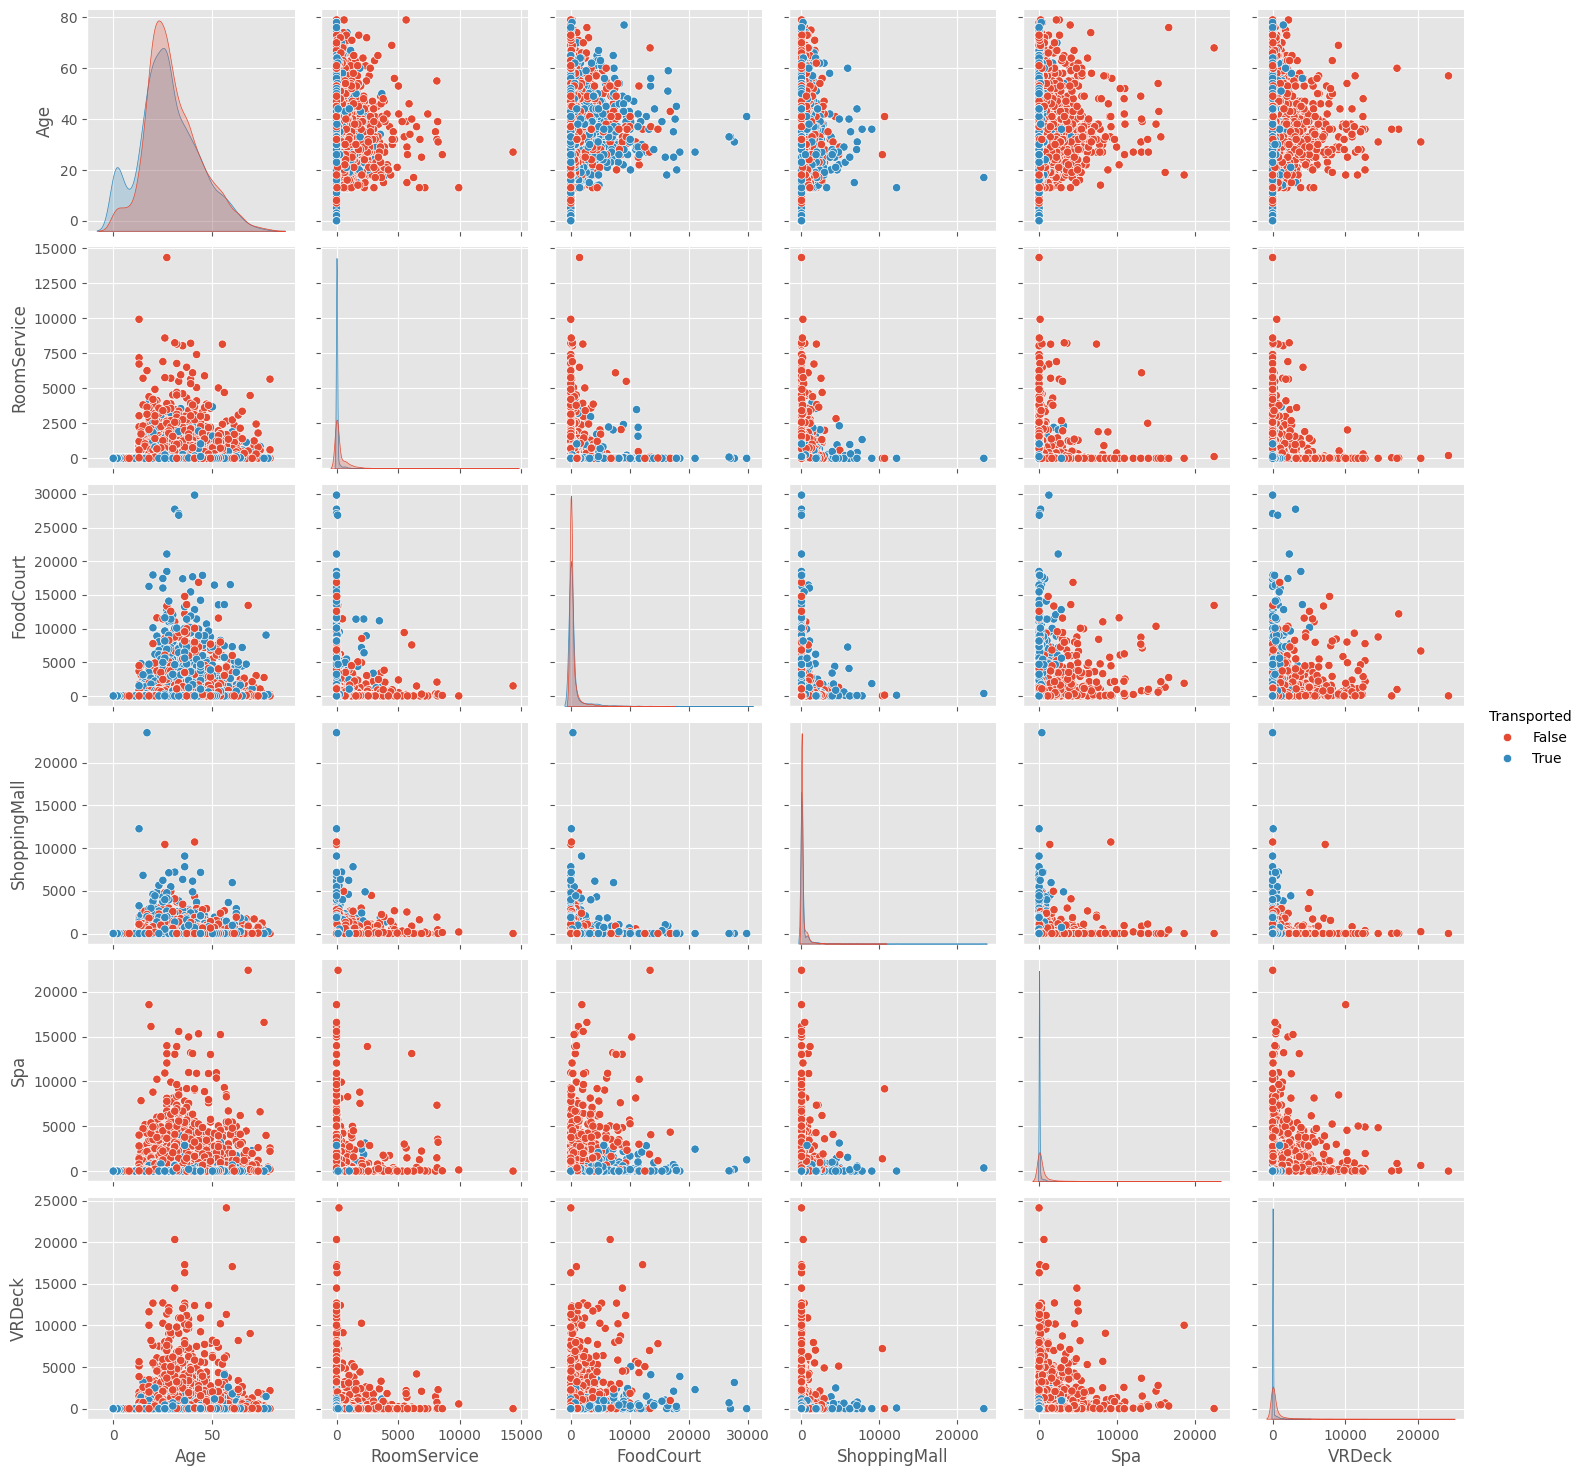

In [ ]:
# First the Numeric features
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, ax = plt.subplots(len(numeric_features), 2, figsize=(15, 20))
for i, feature in enumerate(numeric_features):
    if df_train[feature].dtype in ['float64', 'int64']:
      sns.histplot(df_train[feature].dropna(), kde=True, ax=ax[i, 0])
      sns.boxplot(x=feature, data=df_train, ax=ax[i, 1])
    else:
        print(f"Skipping {feature} as it's not numeric.")

# then, the Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(20, 5))
for i, feature in enumerate(categorical_features):
  if feature in df_train.columns:
    sns.countplot(x=feature, data=df_train, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    plt.xticks(rotation=45)


# Filtering the dataframe to only numeric types for correlation matrix
numeric_df = df_train.select_dtypes(include=[np.number])

# Re-add 'Transported' to numeric_df for plotting purposes
numeric_df['Transported'] = df_train['Transported']

# Pairwise relationships and correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')



# Scatter plots for continuous variables with Transported status
sns.pairplot(numeric_df, hue='Transported')
plt.show()




### **Insights from EDA**
**TARGET VARIABLE**
##### TRANSPORTED: The Distribution of the target Variable (Transported) shows that the data is fairly balanced, and does not require any method to balance the data.
**FEATURES VARIABLES**

 The Distribution of the numerical features variables shows extreme values are present in our data, indicating a skewed distribution for expenditure variables like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck, whereas the Age variable shows a more uniform distribution without significant skewness.
##### AGE: The age data mostly clusters around a middle value with more younger than older people, showing a slight trend toward younger passengers. A few very old passengers stand out, but they are not very common.
##### Room Service: Most people aren ot spending money on room service. This is clear from most of the data clustering at the lowest values. However, there are a few cases where spending is unusually high.
##### FoodCourt: The situation in the food court is much like that in room service. While the majority of people spend very little, a small number of passengers do spend a lot, which pulls the average up.
##### ShoppingMall: Similarly, spending in the shopping mall is generally low, with a few people spending much more than average.
##### SPA : Spending on spa services shows a similar trend, it is generally low, with a small number of higher spenders.
##### VRDECK : Spending on the VRDeck is mostly minimal, but there are some exceptions where spending is high. This pattern is similar to the other luxury and recreational services onboard.
##### Home Planet: Most passengers come from Earth, with fewer from Europa and even fewer from Mars.
##### Cryosleep: Most people choose not to use cryosleep.
##### Destination: TRAPPIST-1e is by far the preferred destination compared to PSO J318.5-22 and 55 Cancri e.
##### VIP: Only a small group of passengers are classified as VIPs


### Correlation Matrix of the numerical Features:

##### Age and Spending: Older passengers tend to spend more on services like the FoodCourt and VRDeck.
##### Spending Category: People who spend in one area often spend in others too. For instance, those who spend at the FoodCourt also tend to spend at the Spa.
##### Transportation Outcome: Passengers who were transported tend to spend less in areas such as RoomService, Spa, and VRDeck.


### Insights from the Pair Plot

##### Age and Transportation: The age graph shows that both young and old passengers are mixed in whether they were transported or not, but there's a slight trend of younger passengers being transported more often.
##### Spending Behaviour and Transportation: Passengers who weren't transported tend to spend more on things like room service, spas, and VRDecks. This could mean that people who use these services more might be on the trip for leisure or other reasons that don’t involve moving to a new place.
##### Correlation of Spending with Age: Older passengers generally spend more across services like room service, food courts, and others. This trend is clear when looking at how age relates to spending in various plots.


### Data Pre-Processing


In [ ]:
# Encoding the Catgorical Data
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(df_train[cat_columns])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cat_columns))
# Concatenate the original DataFrame with the new DataFrame containing the encoded variables
df_train = pd.concat([df_train.drop(cat_columns, axis=1), encoded_df], axis=1)
df_train.head()

PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1     0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2     0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3     0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4     0004_01  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported  HomePlanet_Europa  HomePlanet_Mars  ...  \
0        False                1.0              0.0  ...   
1         True                0.0              0.0  ...   
2        False                1.0              0.0  ...   
3        False                1.0              0.0  ...   
4         True                0.0              0.0  ...   

   Name_Zinopus Spandisket  Name_Zinor Axlentindy  Name_Zinor Proorbeng  \
0                      0.0                    0.0                   0.0   
1                      0.0                    0.0                   0.0   
2                      0.0                    0.0                   0.0   
3                      0.0                    0.0                   0.0   
4                      0.0                    0.0                   0.0   

   Name_Zinoth Lansuffle  Name_Zosmark Trattle  Name_Zosmark Unaasor  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   Name_Zosmas Ineedeve  Name_Zosmas Mormonized  Name_Zubeneb Flesping  \
0                   0.0                     0.0                    0.0   
1                   0.0                     0.0                    0.0   
2                   0.0                     0.0                    0.0   
3                   0.0                     0.0                    0.0   
4                   0.0                     0.0                    0.0   

   Name_Zubeneb Pasharne  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 15045 columns]

In [ ]:
# Scaling the numerical Variables
# Standardizing the numeric columns to have mean = 0 and standard deviation = 1
scaler = StandardScaler()
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])


In [ ]:
# Splitting the Data
# 'Transported' is the target variable
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Displaying the data types
print(X_train.info())
print("\nSample data:")
print(X_train.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Columns: 15044 entries, PassengerId to Name_Zubeneb Pasharne
dtypes: float64(15043), object(1)
memory usage: 798.2+ MB
None

Sample data:
     PassengerId       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
2333     2513_01 -0.055109    -0.333105  -0.246559     -0.283579  0.312227   
2589     2774_02 -0.822163    -0.333105   0.467861     -0.231737 -0.270626   
8302     8862_04 -0.055109    -0.333105  -0.281027     -0.283579 -0.270626   
8177     8736_02 -0.612966    -0.333105  -0.279773      0.199721  0.596546   
500      0539_02  0.502749    -0.333105  -0.281027     -0.283579 -0.270626   

        VRDeck  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  ...  \
2333 -0.263003                0.0              0.0             0.0  ...   
2589 -0.263003                0.0              0.0             0.0  ...   
8302 -0.263003                1.0              0.0             1.0  ...   
8177 -0.263003       

### MODEL SELECTION AND TRAINING

**Using the Logistic Regression Model**

In [ ]:
# Initialize and training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making the prediction on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5048878665899943
Confusion Matrix:
 [[  0 861]
 [  0 878]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       861
        True       0.50      1.00      0.67       878

    accuracy                           0.50      1739
   macro avg       0.25      0.50      0.34      1739
weighted avg       0.25      0.50      0.34      1739



**Using the Decision Tree Model**

In [ ]:
# Initializing and training the Decision Tree model
Dc_model = DecisionTreeClassifier(random_state=42)
Dc_model.fit(X_train, y_train)

# Make predictions
y_pred_Dc = Dc_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_Dc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Dc))
print("Classification Report:\n", classification_report(y_test, y_pred_Dc))


Decision Tree Accuracy: 0.7567567567567568
Confusion Matrix:
 [[640 221]
 [202 676]]
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.74      0.75       861
        True       0.75      0.77      0.76       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



**Using the Random Forest Model**

In [ ]:
# Train the model
Rf_model = RandomForestClassifier(random_state=42)
Rf_model.fit(X_train, y_train)

# Make predictions
y_pred_Rf = Rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_Rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Rf))
print("Classification Report:\n", classification_report(y_test, y_pred_Rf))

Random Forest Accuracy: 0.7924094307073031
Confusion Matrix:
 [[677 184]
 [177 701]]
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.79      0.79       861
        True       0.79      0.80      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
# Summary of model performances
logistic_regression_accuracy = accuracy_score(y_test, y_pred_lr)
decision_tree_accuracy = accuracy_score(y_test, y_pred_Dc)
random_forest_accuracy = accuracy_score(y_test, y_pred_Rf)

# Create a dictionary with model names and their corresponding accuracies
model_performance = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy]
}

# Convert the dictionary into a DataFrame
summary_perf_df = pd.DataFrame(model_performance)

# Display the DataFrame
print(summary_perf_df)


                 Model  Accuracy
0  Logistic Regression  0.504888
1        Decision Tree  0.756757
2        Random Forest  0.792409


**Using the H2O AutoML Model**

In [ ]:
# initializing the H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyyrlke95
  JVM stdout: /tmp/tmpyyrlke95/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyyrlke95/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.3
H2O_cluster_version_age:    28 days, 2 hours and 15 minutes
H2O_cluster_name:           H2O_from_python_unknownUser_12txp1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    12.75 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Converting the DataFrames to H2O Frames
train_hf = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_hf = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
print(test_hf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  PassengerId        Age    RoomService    FoodCourt    ShoppingMall        Spa     VRDeck    HomePlanet_Europa    HomePlanet_Mars    CryoSleep_True    Cabin_A/0/S    Cabin_A/1/S    Cabin_A/10/P    Cabin_A/10/S    Cabin_A/100/S    Cabin_A/101/S    Cabin_A/102/S    Cabin_A/103/S    Cabin_A/104/S    Cabin_A/106/S    Cabin_A/107/S    Cabin_A/11/S    Cabin_A/13/P    Cabin_A/14/P    Cabin_A/14/S    Cabin_A/16/P    Cabin_A/16/S    Cabin_A/17/S    Cabin_A/18/P    Cabin_A/18/S    Cabin_A/19/P    Cabin_A/19/S    Cabin_A/2/P    Cabin_A/2/S    Cabin_A/20/P    Cabin_A/20/S    Cabin_A/21/P    Cabin_A/21/S    Cabin_A/22/P    Cabin_A/22/S    Cabin_A/23/P    Cabin_A/23/S    Cabin_A/24/P    Cabin_A/24/S    Cabin_A/25/P    Cabin_A/25/S    Cabin_A/26/S    Cabin_A/27/P    Cabin_A/27/S    Cabin_A/28/S    Cabin_A/29/P   

In [ ]:
# Defining the target variable and the features
target = 'Transported'
features = [col for col in train_hf.columns if col != target]

In [ ]:
# Creating and training the AutoML model
aml = H2OAutoML(max_models=10,
                seed=1234,
                max_runtime_secs=1800,
                sort_metric='AUC')

aml.train(x=features, y=target, training_frame=train_hf)

AutoML progress: |
19:09:20.277: _train param, Dropping bad and constant columns: [Name_Idarry Nichaner, Cabin_F/413/P, Cabin_F/413/S, Cabin_G/113/P, Cabin_G/366/P, Name_Bakix Razo, Cabin_G/509/S, Name_Pies Welto, Cabin_F/1229/S, Cabin_G/509/P, Name_Joyton Hewson, Cabin_F/666/P, Cabin_C/142/P, Cabin_F/1086/P, Name_Wandy Deckerson, Name_Wenny Bushafford, Name_Luzel Willy, Cabin_G/1130/S, Name_Jaimer Pacerty, Cabin_F/786/P, Name_Losp Reake, Cabin_G/486/P, Cabin_G/10/S, Name_Weino Icablebat, Name_Whark Cooki, Name_Elanda Garnes, Name_Dandy Connon, Cabin_G/23/S, Name_Dunch Mepie, Cabin_A/61/S, Name_Denny Russon, Name_Jenn Lynnerett, Name_Zubeneb Flesping, Name_Ankabit Parbleake, Name_Jurs Binie, Cabin_G/1383/S, Cabin_G/1383/P, Name_Edaruma Bacistion, Cabin_F/1491/S, Cabin_G/869/P, Name_Done Ingston, Name_Cindee Flé, Name_Clues Kidne, Name_Canonon Dompreced, Name_Eduana Rames, Cabin_E/298/S, Cabin_G/473/P, Name_Thabius Stacketent, Cabin_B/94/S, Cabin_G/1156/P, Cabin_G/473/S, Cabin_G/220/S, 

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240709_190859


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      0/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06688921095089918
RMSE: 0.2586294858497368
LogLoss: 0.23713238491037728
AUC: 0.9769234509525223
AUCPR: 0.9785484965320005
Gini: 0.9538469019050446
Null degrees of freedom: 4875
Residual degrees of freedom: 4872
Null deviance: 6759.892492407722
Residual deviance: 2312.5150176459997
AIC: 2320.5150176459997

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5698334312925928
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  2338     84      0.0347   (84.0/2422.0)
True   260      2194    0.1059   (260.0/2454.0)
Total  2598     2278    0.0705   (344.0/4876.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.569833     0.927303  168
max f2                       0.219646     0.938443  289
max f0point5                 0.607294     0.952549  158
max accuracy                 0.569833     0.92945   168
max precision                0.991625     1         0
max recall                   0.0985894    1         334
max specificity              0.991625     1         0
max absolute_mcc             0.569833     0.861207  168
max min_per_class_accuracy   0.482015     0.914946  196
max mean_per_class_accuracy  0.569833     0.929684  168
max tns                      0.991625     2422      0
max fns                      0.991625     2401      0
max fps                      0.0027341    2422      399
max tps                      0.0985894    2454      334
max tnr                      0.991625     1         0
max fnr                      0.991625     0.978403  0
max fpr                      0.0027341    1         399
max tpr                      0.0985894    1         334

Gains/Lift Table: Avg response rate: 50.33 %, avg score: 49.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102543                   0.991306           1.98696    1.98696            1                0.991648   1                           0.991648            0.0203749       0.0203749                  98.696    98.696             0.0203749
2        0.0207137                   0.989521           1.98696    1.98696            1                0.990443   1                           0.99104             0.0207824       0.0411573                  98.696    98.696             0.0411573
3        0.0301477                   0.988655           1.98696    1.98696            1                0.989123   1                           0.99044             0.0187449       0.0599022                  98.696    98.696             0.0599022
4        0.0401969                   0.988027           1.98696    1.98696            1                0.9883 

In [ ]:
# Viewing the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240709_190859  0.874222   0.443654  0.884974                0.208728  0.380171  0.14453
StackedEnsemble_AllModels_1_AutoML_1_20240709_190859     0.87421    0.441994  0.883349                0.199637  0.379389  0.143936
GBM_1_AutoML_1_20240709_190859                           0.872989   0.444492  0.884225                0.207503  0.38044   0.144734
GBM_2_AutoML_1_20240709_190859                           0.871413   0.446989  0.880519                0.203827  0.380971  0.145139
GBM_4_AutoML_1_20240709_190859                           0.870972   0.447406  0.877349                0.204881  0.382229  0.146099
GBM_3_AutoML_1_20240709_190859                           0.870968   0.446849  0.878543                0.210262  0.381969  0.145901
XGBoost_3_AutoML_1_20240709_190859                       0.867627   0.455799  0.8780

In [ ]:
# getting the best model that is the leader
leader_model = aml.leader
print(leader_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240709_190859


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      0/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06688921095089918
RMSE: 0.2586294858497368
LogLoss: 0.23713238491037728
AUC: 0.9769234509525223
AUCPR: 0.9785484965320005
Gini: 0.9538469019050446
Null degrees of freedom: 4875
Residual degrees of freedom: 4872
Nu

In [ ]:
# Predicting the best model on the test set and evaluating it's performance
predictions = leader_model.predict(test_hf)
performance = leader_model.model_performance(test_hf)
print(performance)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.14355922685119205
RMSE: 0.3788921044983546
LogLoss: 0.43706109888575567
AUC: 0.8755056497847764
AUCPR: 0.888219516116758
Gini: 0.7510112995695528
Null degrees of freedom: 1738
Residual degrees of freedom: 1735
Null deviance: 2410.6904633576705
Residual deviance: 1520.0985019246582
AIC: 1528.0985019246582

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.397679441149383
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  603      258     0.2997   (258.0/861.0)
True   116      762     0.1321   (116.0/878.0)
Total  719      1020    0.2151   (374.0/1739.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.397679     

## Explanable AI And Model Evaluation


['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Cabin_A/0/S', 'Cabin_A/1/S', 'Cabin_A/10/P', 'Cabin_A/10/S', 'Cabin_A/100/S', 'Cabin_A/101/S', 'Cabin_A/102/S', 'Cabin_A/103/S', 'Cabin_A/104/S', 'Cabin_A/106/S', 'Cabin_A/107/S', 'Cabin_A/11/S', 'Cabin_A/13/P', 'Cabin_A/14/P', 'Cabin_A/14/S', 'Cabin_A/16/P', 'Cabin_A/16/S', 'Cabin_A/17/S', 'Cabin_A/18/P', 'Cabin_A/18/S', 'Cabin_A/19/P', 'Cabin_A/19/S', 'Cabin_A/2/P', 'Cabin_A/2/S', 'Cabin_A/20/P', 'Cabin_A/20/S', 'Cabin_A/21/P', 'Cabin_A/21/S', 'Cabin_A/22/P', 'Cabin_A/22/S', 'Cabin_A/23/P', 'Cabin_A/23/S', 'Cabin_A/24/P', 'Cabin_A/24/S', 'Cabin_A/25/P', 'Cabin_A/25/S', 'Cabin_A/26/S', 'Cabin_A/27/P', 'Cabin_A/27/S', 'Cabin_A/28/S', 'Cabin_A/29/P', 'Cabin_A/29/S', 'Cabin_A/3/P', 'Cabin_A/3/S', 'Cabin_A/30/P', 'Cabin_A/30/S', 'Cabin_A/31/P', 'Cabin_A/32/S', 'Cabin_A/35/P', 'Cabin_A/35/S', 'Cabin_A/36/S', 'Cabin_A/37/P', 'Cabin_A/37/S', 'Cabin_A/

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

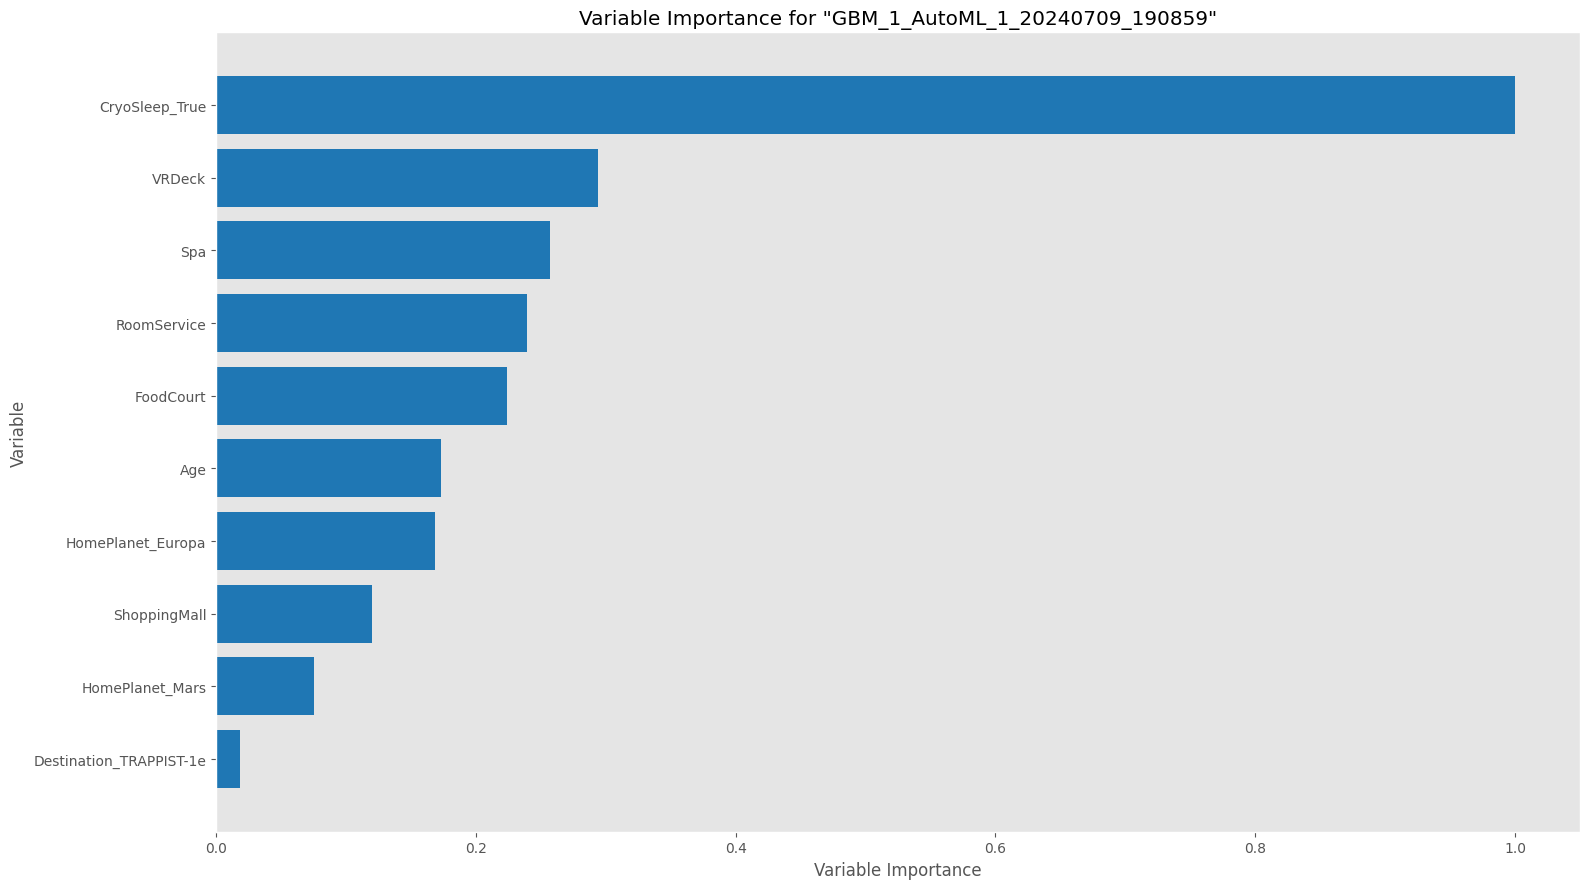

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

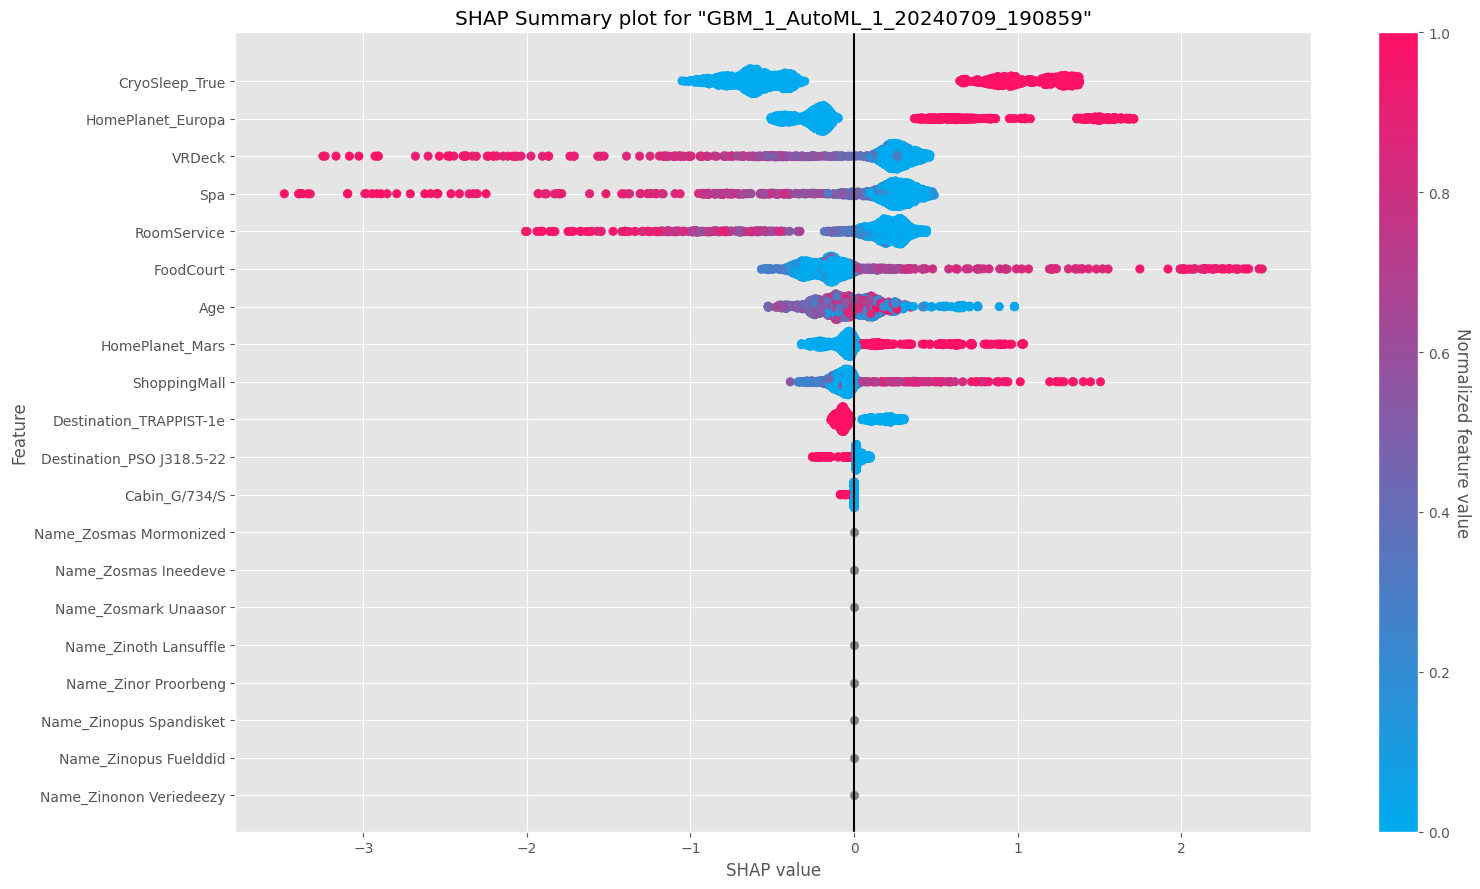

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

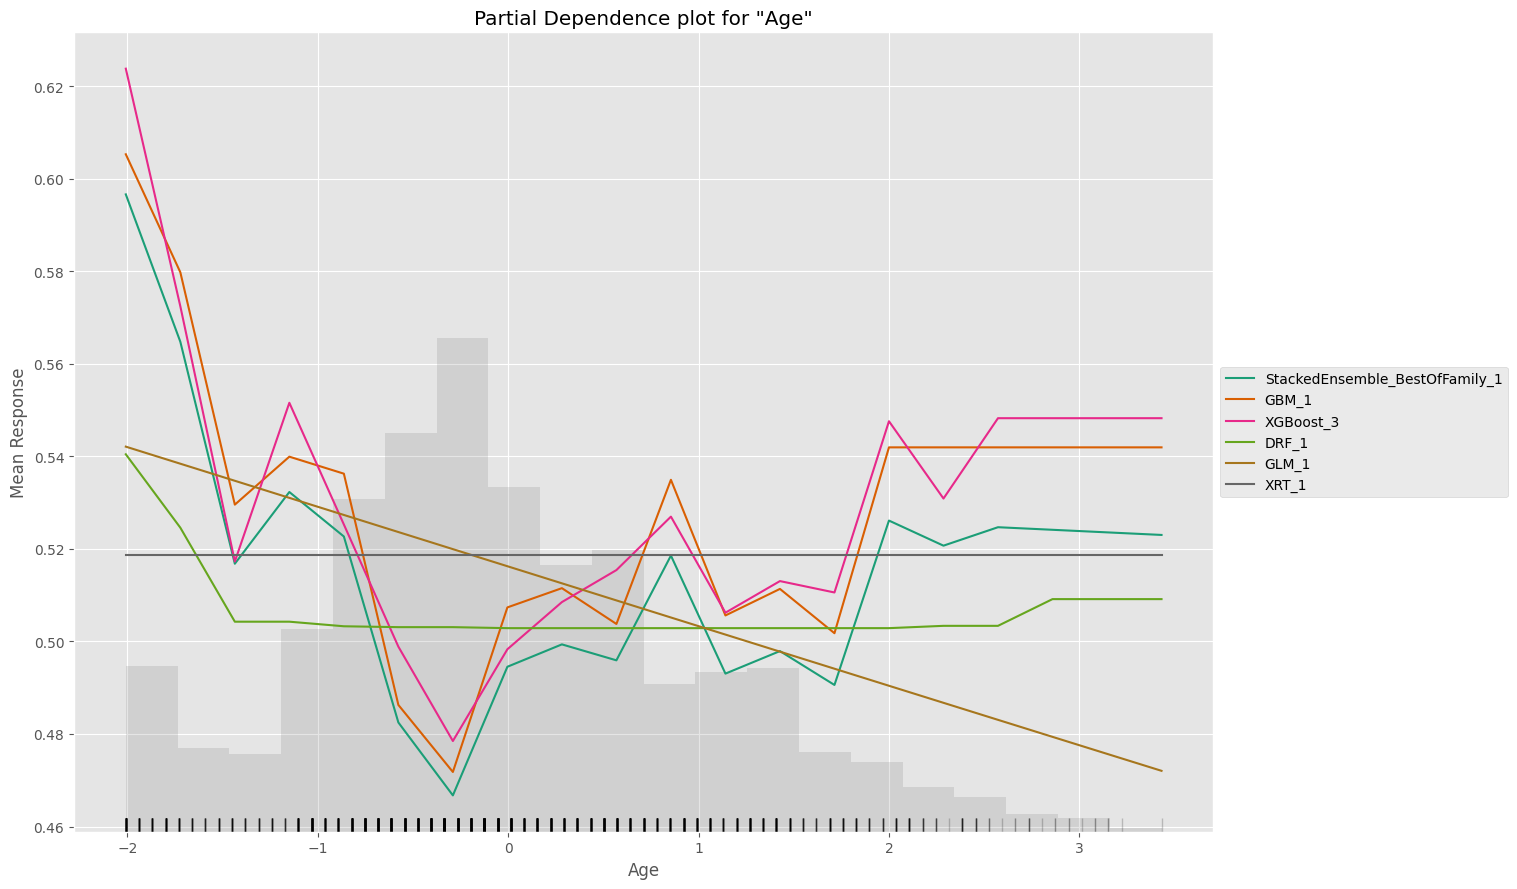

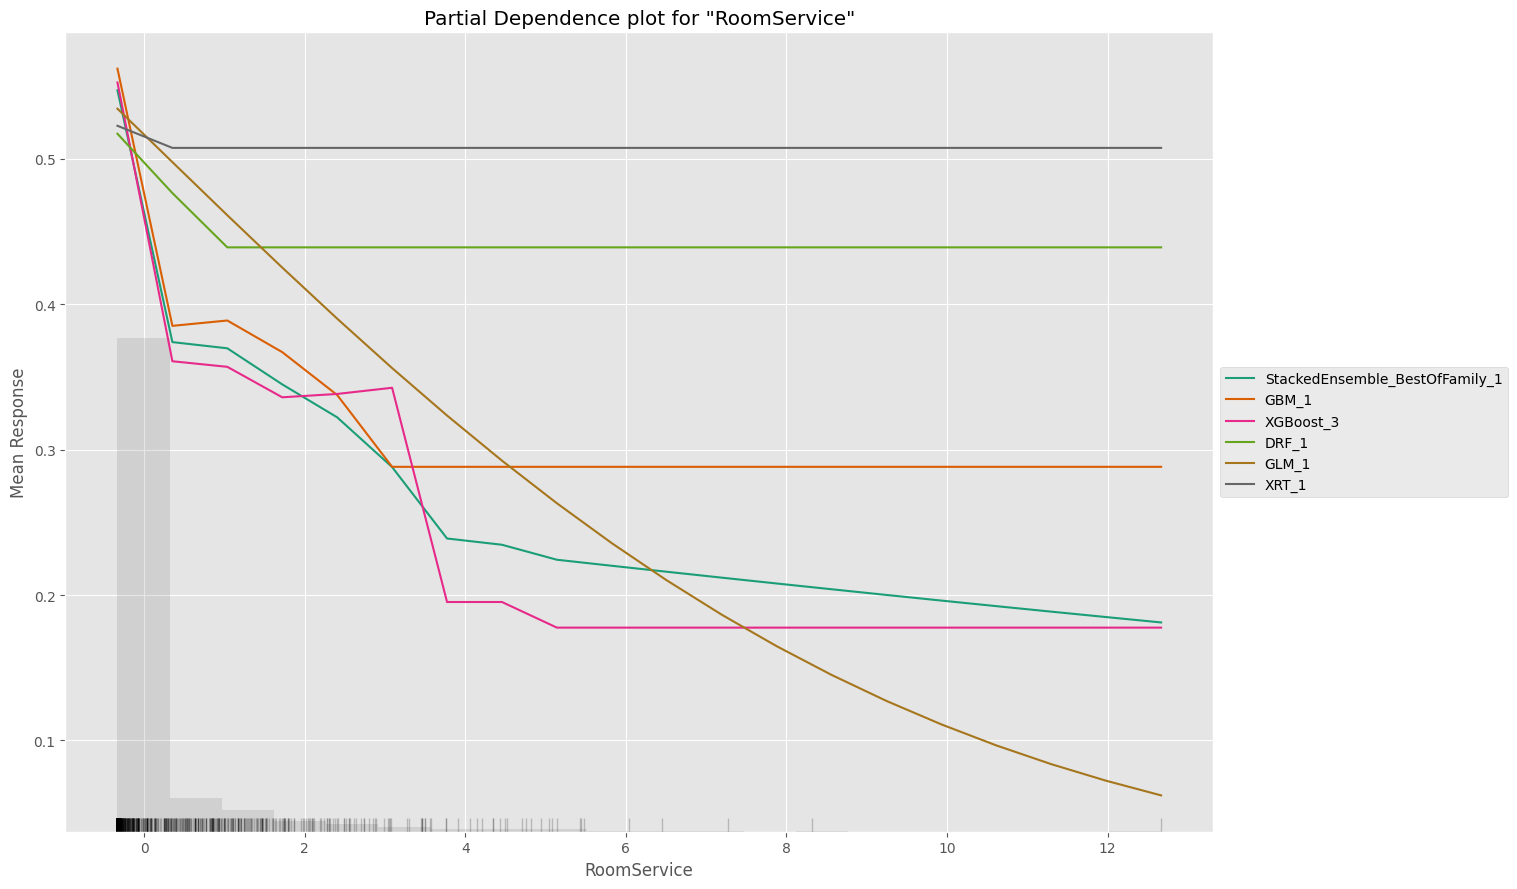

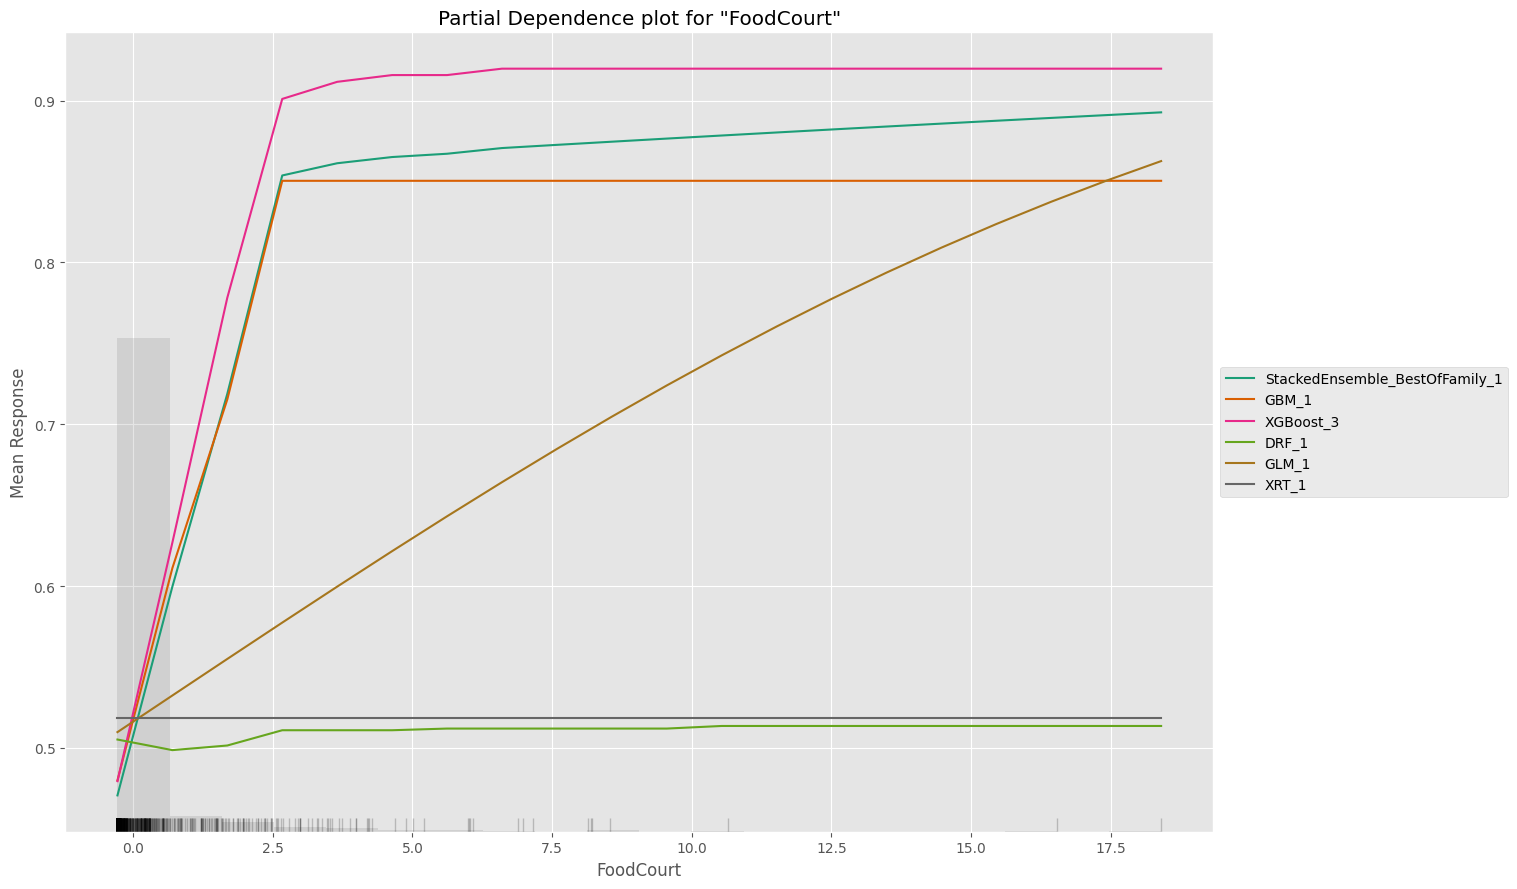

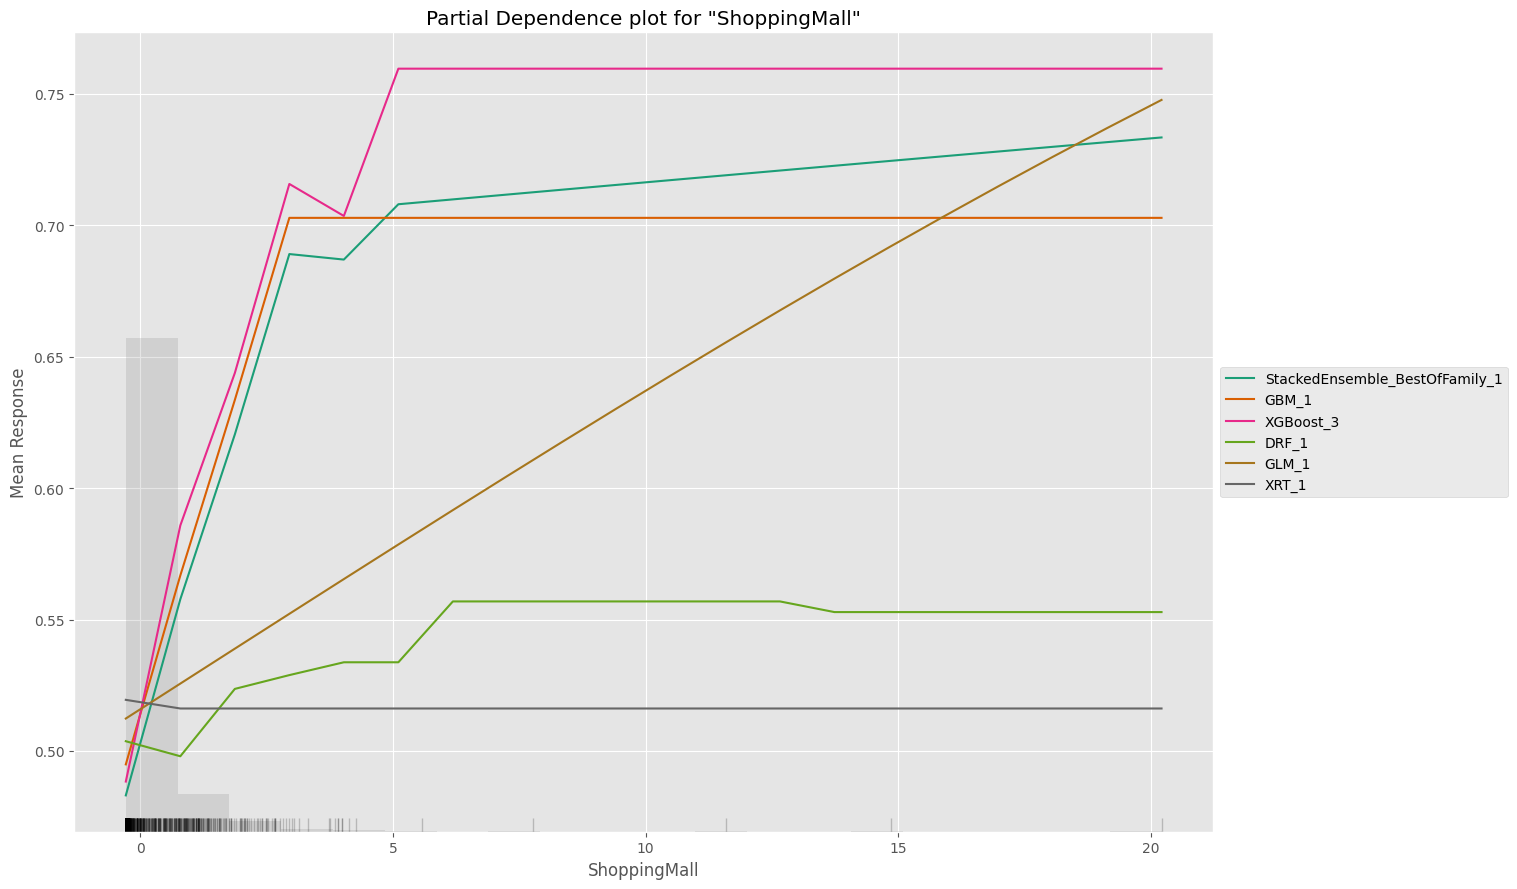

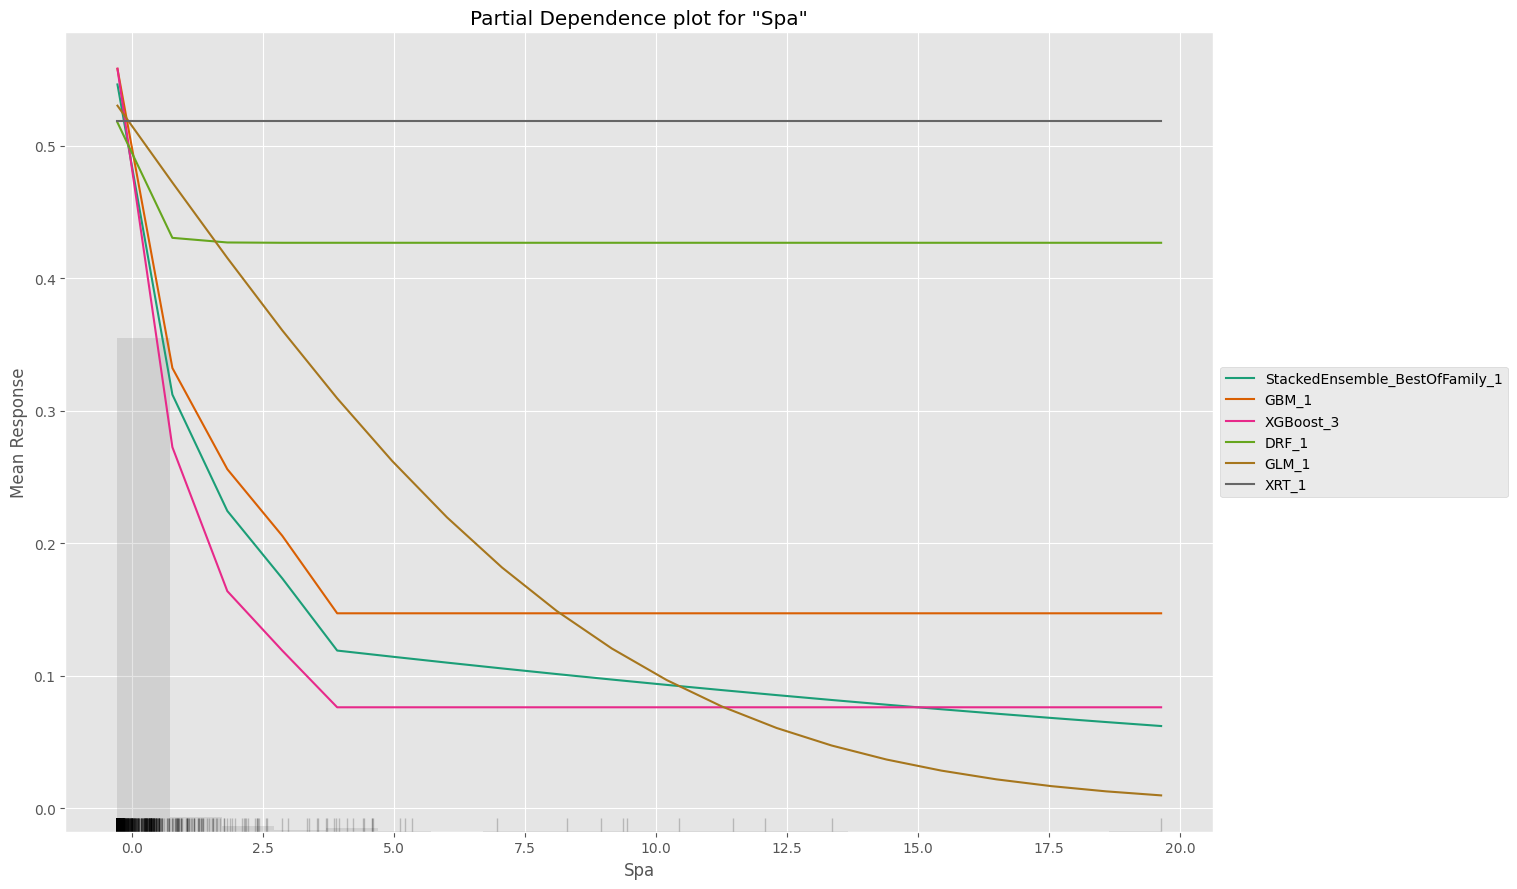

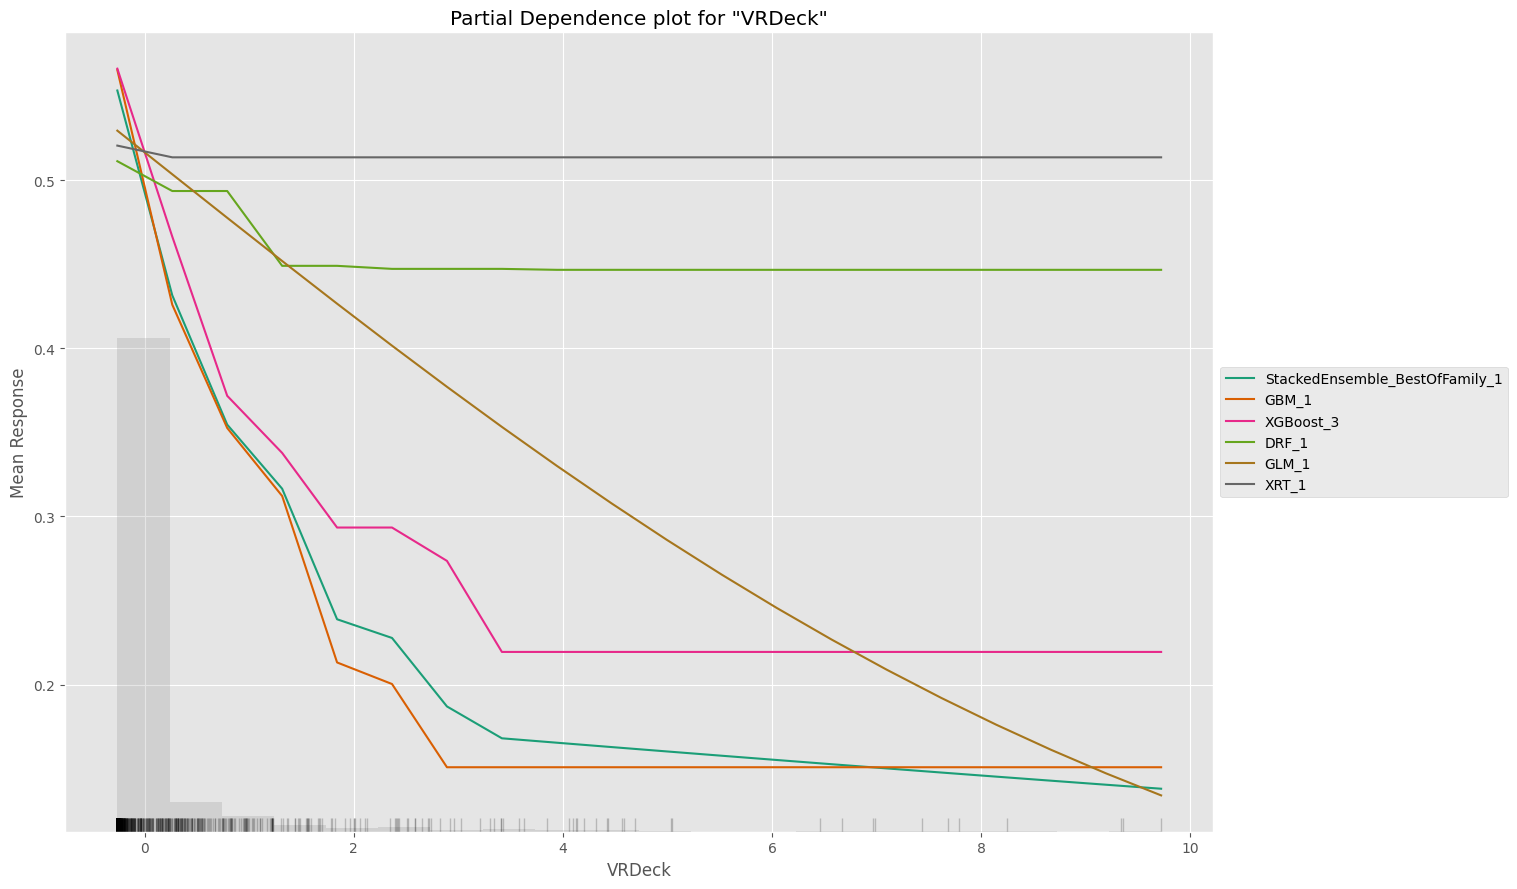

In [ ]:

# display the column names on the H20 test dataframe
print(test_hf.columns)

# Plot XAI information
aml.explain(test_hf, include_explanations=["varimp", "shap_summary", "pdp"], \
            columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']);


In [ ]:
# Save the model
model_path = h2o.save_model(model=leader_model, path="/path/to/save/model", force=True)
print(model_path)


/path/to/save/model/StackedEnsemble_BestOfFamily_1_AutoML_1_20240709_190859


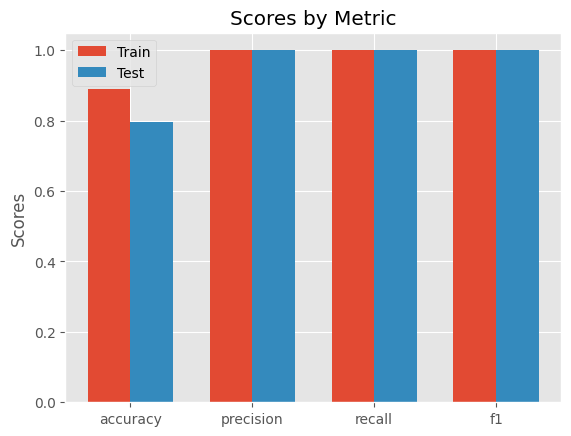

In [ ]:
# Visualizing this using Performance metrics comparison
# Evaluate model performance on the training and test data
train_perf = leader_model.model_performance(train_hf)
test_perf = leader_model.model_performance(test_hf)

# Defining the metrics to plot
metrics = []
train_metrics = []
test_metrics = []

try:
    train_acc = train_perf.accuracy()[0][1]
    test_acc = test_perf.accuracy()[0][1]
    metrics.append('accuracy')
    train_metrics.append(train_acc)
    test_metrics.append(test_acc)
except AttributeError:
    print("Accuracy metric not available.")

try:
    train_precision = train_perf.precision()[0][1]
    test_precision = test_perf.precision()[0][1]
    train_recall = train_perf.recall()[0][1]
    test_recall = test_perf.recall()[0][1]
    metrics.extend(['precision', 'recall'])
    train_metrics.extend([train_precision, train_recall])
    test_metrics.extend([test_precision, test_recall])

    # Calculating the F1 score
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    metrics.append('f1')
    train_metrics.append(train_f1)
    test_metrics.append(test_f1)
except AttributeError:
    print("Precision or Recall metrics not available.")

# Plotting
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_metrics, width, label='Train')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [ ]:
# Applying the trained model on the original test dataset
# checking for missing value in the test dataset
print("\nMissing values in the test Data:")
missing_valuestest = df_test.isnull().sum()
print(missing_valuestest[missing_valuestest > 0])



Missing values in the test Data:
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
# We will be creating imputers
num_imputertest = SimpleImputer(strategy='median')
cat_imputertest = SimpleImputer(strategy='most_frequent')

# The columns to impute
num_columnstest = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_columnstest = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

# Imputing the numeric columns
df_test[num_columnstest] = num_imputertest.fit_transform(df_test[num_columnstest])

# Imputing the categorical columns
df_test[cat_columnstest] = cat_imputertest.fit_transform(df_test[cat_columnstest])

# Checking if any missing values remain
print("Missing values after imputation:")
print(df_test.isnull().sum())

Missing values after imputation:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


In [ ]:
# checking datatype
print(df_test.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [ ]:
# Converting 'CryoSleep' and 'VIP' to boolean
df_test['CryoSleep'] = df_test['CryoSleep'].astype('bool')
df_test['VIP'] = df_test['VIP'].astype('bool')

In [ ]:
# confirming the  datatype
print(df_test.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [ ]:
# We need to exclude 'PassengerId', 'Name', and any other non-relevant object type columns
columns_to_excludetest = ['PassengerId', 'Name', 'HomePlanet', 'Cabin', 'Destination']
df_numerictest = df_test.drop(columns=columns_to_excludetest)

In [ ]:
# Ensuring that all remaining columns are numeric or boolean
for column in df_numerictest.columns:
    if df_numerictest[column].dtype == 'object':
        df_numerictest[column] = pd.to_numeric(df_numerictest[column], errors='coerce')

# Checking data types to confirm all are numeric or boolean
print("Data types after conversion:")
print(df_numerictest.dtypes)

Data types after conversion:
CryoSleep          bool
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


In [ ]:
# Encoding the Catgorical Test Data
# One-hot encode categorical variables
encodertest = OneHotEncoder(sparse=False, drop='first')
encoded_columnstest = encodertest.fit_transform(df_test[cat_columnstest])
encoded_dftest = pd.DataFrame(encoded_columnstest, columns=encodertest.get_feature_names_out(cat_columnstest))
# Concatenate the original DataFrame with the new DataFrame containing the encoded variables
df_test = pd.concat([df_test.drop(cat_columnstest, axis=1), encoded_dftest], axis=1)
df_test.head(20)

PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0      0013_01  27.0          0.0        0.0           0.0     0.0     0.0   
1      0018_01  19.0          0.0        9.0           0.0  2823.0     0.0   
2      0019_01  31.0          0.0        0.0           0.0     0.0     0.0   
3      0021_01  38.0          0.0     6652.0           0.0   181.0   585.0   
4      0023_01  20.0         10.0        0.0         635.0     0.0     0.0   
5      0027_01  31.0          0.0     1615.0         263.0   113.0    60.0   
6      0029_01  21.0          0.0        0.0           0.0     0.0     0.0   
7      0032_01  20.0          0.0        0.0           0.0     0.0     0.0   
8      0032_02  23.0          0.0        0.0           0.0     0.0     0.0   
9      0033_01  24.0          0.0      639.0           0.0     0.0     0.0   
10     0037_01  19.0        339.0        3.0         136.0   237.0     0.0   
11     0040_01  45.0        932.0       74.0           0.0     7.0  1010.0   
12     0040_02  44.0          0.0     1561.0           0.0    14.0   224.0   
13     0042_01  46.0          0.0        0.0           0.0     0.0     0.0   
14     0046_01  21.0          0.0        0.0           0.0  1687.0    92.0   
15     0046_02  27.0          0.0        0.0           0.0   903.0     0.0   
16     0046_03  20.0          2.0       12.0         253.0   457.0   690.0   
17     0047_01  44.0          0.0        0.0           0.0     0.0     0.0   
18     0047_02  29.0          0.0     7708.0         243.0   569.0   343.0   
19     0047_03  40.0         26.0     1925.0           8.0  3144.0    63.0   

    HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  ...  \
0                 0.0              0.0             1.0  ...   
1                 0.0              0.0             0.0  ...   
2                 1.0              0.0             1.0  ...   
3                 1.0              0.0             0.0  ...   
4                 0.0              0.0             0.0  ...   
5                 0.0              0.0             0.0  ...   
6                 1.0              0.0             1.0  ...   
7                 1.0              0.0             1.0  ...   
8                 1.0              0.0             1.0  ...   
9                 0.0              0.0             0.0  ...   
10                0.0              0.0             0.0  ...   
11                1.0              0.0             0.0  ...   
12                1.0              0.0             0.0  ...   
13                0.0              1.0             1.0  ...   
14                0.0              0.0             0.0  ...   
15                0.0              0.0             0.0  ...   
16                0.0              0.0             0.0  ...   
17                1.0              0.0             1.0  ...   
18                1.0              0.0             0.0  ...   
19                1.0              0.0             0.0  ...   

    Name_Zinoces Muspereed  Name_Zinon Ativeezy  Name_Zinon Nairconed  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   
5                      0.0                  0.0                   0.0   
6                      0.0                  0.0                   0.0   
7                      0.0                  0.0                   0.0   
8                      0.0                  0.0                   0.0   
9                      0.0                  0.0                   0.0   
10                     0.0                  0.0                   0.0   
11                     0.0                  0.0                   0.0   
12                     0.0                  0.0                   0.0   
13                

In [ ]:
# Scaling the numerical Variables
# Standardizing the numeric columns to have mean = 0 and standard deviation = 1
scalertest = StandardScaler()
df_test[num_columnstest] = scalertest.fit_transform(df_test[num_columnstest])

In [ ]:
# Preparing the test data in H2O AutoML
test_data_hf = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Generate predictions
predictions_test = leader_model.predict(test_data_hf)
predictions_test.head()
predictions_test.shape

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


(4277, 3)

In [ ]:
# Convert predictions H2OFrame to Pandas DataFrame for easier handling
predictions_df = h2o.as_list(predictions_test)
predictions_df = predictions_df['predict'].astype(bool)
predictions_df.head()


0     True
1    False
2     True
3     True
4     True
Name: predict, dtype: bool

### Prepare predicitons for Kaggle Challenge submission

In [ ]:
from google.colab import files

# # Using the Sample dataset format as submission format
submission = df_sample.copy()  # Create a copy of the sample submission

# Update the sample submission with the predictions
submission['Transported'] = predictions_df

# Save the updated submission file
submission.to_csv('final_submission.csv', index=False)

# Download the .csv file
files.download("final_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>